In [1]:
from sklearn.model_selection import train_test_split # Usada para separar dados de treino e teste
import matplotlib.pyplot as plt # Usada para plotar os graficos
import numpy as np
import pandas as pd
import random

In [2]:
# PASSO 1 >> Selecionar um conjunto de dados para treinamento

# Carregar os dados Iris
iris_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')

# Pegando duas classes para classificação (Iris-setosa e Iris-versicolor)
# Removendo Iris-virginica do banco iris
y = iris_data.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# Cria array apenas com os atributos: tamanho do pétala e tamanho da sépala
x = np.array(iris_data.iloc[0:100, [0,2]].values)
# print("\nfinal_iris_data: \n",x) # Debug

# Separando de forma aleatoria os dados de treinamento e teste
# Para alterar o tamanho desejado dos dados de treinamento basta alterar o argumento 'train_size'
train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.5)


In [3]:
# Função para treinar o perceptron
def train_perceptron(x, y, learning_rate=0.01, epochs=10, ng=20):

    weights = [] # Armazenar os pesos
    fitness = [] # Armazenar as aptidões dos pesos
    new_weights = [] # Armazenar os pesos apos classificacao com perceptron

    # PASSO 2 >> Gerar população de pesos (matriz) com AG

    # Iniciando os pesos randomicamente
    print("\nPesos Iniciais: ")
    for i in x:
        weight = np.random.rand(1 + x.shape[1]) - 0.5
        weights.append(weight)
        print(weight)

    # Adicionando o valor 1 em todos os dados de x para nao alterar o bias dos pesos
    x_with_bias = np.hstack((np.ones((x.shape[0], 1)), x))

    # PASSO 3 >> Aplicar Perceptron para classificar

    for w in weights:
        # Cada cromossomo da populacao passa por todas as epocas do perceptron
        for epoch in range(epochs):
            for i in range(len(y)):
                xi = x_with_bias[i]
                yi = y[i]

                # Calculando o produto escalar
                z = np.dot(w, xi)
                predicted_class = 1 if z > 0 else -1

                # Funcao de erro para atualizacao dos pesos
                error = (yi - predicted_class)

                # Atualizando os pesos
                w = [w[j] + learning_rate * error * xi[j] for j in range(len(w))]

        new_weights.append(w)

    print("\nPesos pós perceptron: ")
    print(new_weights)

    # PASSO 4 >> Evoluir pesos com AG até um criterio de parada

    # Avalia cada individuo, nesse caso, a aptidão será definida
    # como a soma dos pesos
    # print("\nFitness inicial: ")
    for w in new_weights:
        fit = sum(w)
        # print(fit)
        fitness.append(fit)

    # Processo evolutivo
    for i in range(ng):

        # Seleciona aleatoriamente dois individuos da população (x) para reprodução
        parents = random.sample(new_weights, 2)

        # Seleciona um ponto aleatorio para o crossover
        pcross = random.randint(0,1)

        # Aplica crossover, gerando filhos
        children1 = np.concatenate((parents[0][0:pcross], parents[1][pcross:]))
        children2 = np.concatenate((parents[1][pcross:], parents[0][0:pcross]))

        # PASSO 5 >> Seleção, recombinação, mutação
        # Recombinação aritmetica simples de 1 ponto

        alfa = 0.1
        pcomb1 = random.randint(0,2)
        children1[pcomb1] = alfa
        pcomb2 = random.randint(0,2)
        children2[pcomb2] = alfa

        # Calcula fitness dos filhos

        fitchild1 = sum(children1)
        fitchild2 = sum(children2)

        # Encontra os dois individuos de menor fitness na população

        menor_valor1 = fitness[0]
        pos_menor_valor1 = 0
        menor_valor2 = fitness[1]
        pos_menor_valor2 = 1

        tam_fitness = len(fitness)
        for i in range(tam_fitness):
            valor = fitness[i]
            if valor < menor_valor1:
                menor_valor2 = menor_valor1
                pos_menor_valor2 = pos_menor_valor1
                menor_valor1 = valor
                pos_menor_valor1 = i
            elif valor < menor_valor2:
                menor_valor2 = valor
                pos_menor_valor2 = i

        # Se os novos filhos estão melhores que os dois piores individuos, faz a troca

        if fitchild1 > menor_valor1 :
            fitness[pos_menor_valor1] = fitchild1
            weights[pos_menor_valor1] = children1
        if fitchild2 > menor_valor2 :
            fitness[pos_menor_valor2] = fitchild2
            weights[pos_menor_valor2] = children2

    # print("\nFitness final: ")
    # for fit in fitness:
    #    print(fit)

    # Finalizado o processo evolutivo buscamos o individuo com maior fitness
    maior_fit = fitness[0]
    pos_maior_fit = 0
    tam_fitness = len(fitness)

    for i in range(tam_fitness):
        if fitness[i] > maior_fit:
            maior_fit = fitness[0]
            pos_maior_fit = i

    return new_weights[pos_maior_fit]


In [4]:
# Treinando o perceptron
train_weights = train_perceptron(train_x, train_y)
print("\nPesos apos treinamento: ", train_weights)


Pesos Iniciais: 
[ 0.38060166  0.46915048 -0.04781192]
[0.38659723 0.37758355 0.29419769]
[0.08128469 0.4056423  0.26511382]
[-0.24680909 -0.2880206  -0.44970357]
[-0.06319459  0.36505661 -0.22910063]
[-0.44520375 -0.14370292 -0.21233304]
[0.10404182 0.43653068 0.0979003 ]
[ 0.1757228   0.46981034 -0.28648649]
[-0.12907194 -0.07060207 -0.19008862]
[0.03408303 0.25415428 0.19052457]
[-0.34651621  0.1646207  -0.41871266]
[ 0.12738799 -0.00057239 -0.10207604]
[-0.09792838 -0.36227532  0.22384495]
[-0.37225136 -0.23227073  0.09576384]
[-0.43136759  0.45379833  0.0517566 ]
[ 0.13242448  0.44719449 -0.28493243]
[-0.46012026 -0.14269331 -0.38526209]
[ 0.05290969 -0.07131564  0.12325053]
[ 0.2882566  -0.40060265 -0.02129143]
[ 0.34643123 -0.28432173  0.42750785]
[-0.41713975  0.23560002 -0.14724641]
[-0.29845268 -0.04607652  0.33795492]
[ 0.13304878 -0.08240195 -0.00462539]
[-0.40325019 -0.17916364  0.07913989]
[ 0.23745143 -0.43313088 -0.13173245]
[-0.00700901  0.24601634 -0.00078885]
[ 0.20

In [5]:
# PASSO 6 >> Usar melhor individuo (train_weights) para classificar demais dados

# Função para fazer previsões usando os pesos aprendidos
def predict(x, y, weights):
    predictions = []
    x_with_bias = np.hstack((np.ones((x.shape[0], 1)), x))
    for i in range(len(y)):
        xi = x_with_bias[i]
        z = np.dot(weights, xi)
        predicted_class = 1 if z > 0 else -1
        predictions.append(predicted_class)

    return np.array(predictions)

In [6]:
# Fazendo previsões utilizando o conjunto de teste
predictions = predict(test_x, test_y, train_weights)

# Calculando a precisão do modelo
accuracy = np.mean(predictions == test_y)
print("Precisão do modelo:", accuracy)

Precisão do modelo: 1.0


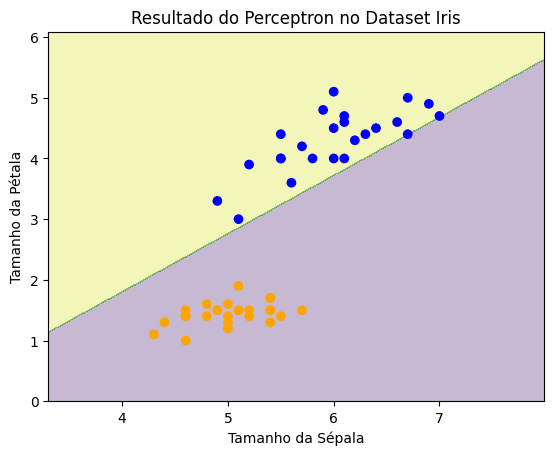

In [7]:
# Função para plotar os resultados obtidos
def plot_results_perceptron(X, y, weights):
    # Encontrando os limites para o eixo x e y, aumentados em 1 para margem
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Cria uma grade de pontos com intervalo de 0.01 entre os limites
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Fazendo previsões para cada ponto na grade usando a função predict
    Z = predict(np.c_[xx.ravel(), yy.ravel()], np.zeros(xx.ravel().shape), weights)
    # Remodelando as previsões para a forma da grade
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)

    # Plotando os pontos de dados no gráfico com cores diferentes para cada classe
    plt.scatter(X[:, 0], X[:, 1], c=['blue' if label == 1 else 'orange' for label in y], marker='o')
    plt.xlabel('Tamanho da Sépala')
    plt.ylabel('Tamanho da Pétala')
    plt.title('Resultado do Perceptron no Dataset Iris')
    plt.show()


plot_results_perceptron(test_x, test_y, train_weights)